In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head(20)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


In [76]:
df2 = pd.read_csv('./survey_results_schema.csv')
df2.head(60)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [77]:
list(df2[df2.Column == 'EdLevel']['QuestionText'])

['Which of the following best describes the highest level of formal education that you’ve completed?']

In [123]:
list(df2[df2.Column == 'DevType']['QuestionText'])

['Which of the following describe you? Please select all that apply.']

In [78]:
df_new = df[(df['Country']=='Germany') & ((df['Gender']=='Man') | (df['Gender']=='Woman')) & ((df['MainBranch']=='I am a developer by profession')|
                                                                                              (df['MainBranch']=='I am not primarily a developer, but I write code sometimes as part of my work'))] 

In [79]:
df_new.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
22,23,I am a developer by profession,Yes,27.0,14,NaN,NaN,NaN,Germany,European Euro,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,8,3
23,24,I am a developer by profession,Yes,45.0,14,Yearly,85000.0,91883.0,Germany,European Euro,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Just as welcome now as I felt last year,42.0,30,20
33,34,I am a developer by profession,Yes,29.0,15,NaN,NaN,NaN,Germany,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Express;React.js;Spring,Angular;Express,Somewhat more welcome now than last year,NaN,10,NaN


In [80]:
len(df_new)

2763

In [81]:
len(df_new[df_new['Gender']=='Woman'])

158

In [82]:
percentage_women= len(df_new[df_new['Gender']=='Woman'])/len(df_new)*100
print(percentage_women)

5.718422005066956


In [83]:
len(df_new[df_new['Gender']=='Man'])

2605

In [84]:
percentage_men= len(df_new[df_new['Gender']=='Man'])/len(df_new)*100
print(percentage_men)

94.28157799493304


In [85]:
df['MainBranch'].unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

In [124]:
df['DevType'].unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [86]:
list(df2[df2.Column == 'Country']['QuestionText'])

['Where do you live?']

In [87]:
list(df2[df2.Column == 'Gender']['QuestionText'])

['Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.']

In [88]:
list(df2[df2.Column == 'UndergradMajor']['QuestionText'])

['What was your primary field of study?']

In [89]:
def create_percentage(df, column_name, column_rename):
    '''
    INPUT
    df - pandas dataframe
    column_name - name of column fow which the percentage of entries will be found
    column_rename - how to rename the index of the new dataframe

    OUTPUT
    df_new - new dataframe
    '''
    study_df_women = (df[df['Gender']=='Woman'][column_name].value_counts()/len(df[df['Gender']=='Woman'][column_name])*100).reset_index()
    study_df_men = (df[df['Gender']=='Man'][column_name].value_counts()/len(df[df['Gender']=='Man'][column_name])*100).reset_index()
    study_df_women.rename(columns={'index': column_rename, column_name: 'Women'}, inplace=True)
    study_df_men.rename(columns={'index': column_rename, column_name: 'Men'}, inplace=True)
    study_df = pd.merge(study_df_women, study_df_men, on=column_rename )
    df_new = pd.melt(study_df, id_vars=[column_rename], value_vars=['Men','Women'], var_name='Gender')

    return df_new

In [90]:
study_df_new = create_percentage(df_new, 'UndergradMajor', 'Field of study')

In [91]:
# HERE I NEED TO FIX IT SO THAT THE PERCENTAGE APPEARS

In [92]:
#def autolabel(rects):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')
        
#for i,m in study_df.iterrows():
#    ax.annotate(text='{:.2f}%'.format(m.loc['Women']),
#                xy=(m.loc[['Women']].max(),i),
#                xytext=(10,0),
#                textcoords='offset pixels',
#                ha='left',
#                va='top'
#               )
#    ax.annotate(text='{:.2f}%'.format(m.loc['Men']),
#                xy=(m.loc[['Men']].max(),i),
#                xytext=(10,0),
#                textcoords='offset pixels',
#                ha='left',
#                va='bottom'
#               )        

#https://stackoverflow.com/questions/37447056/different-colors-for-rows-in-barh-chart-from-pandas-dataframe-python/37447793

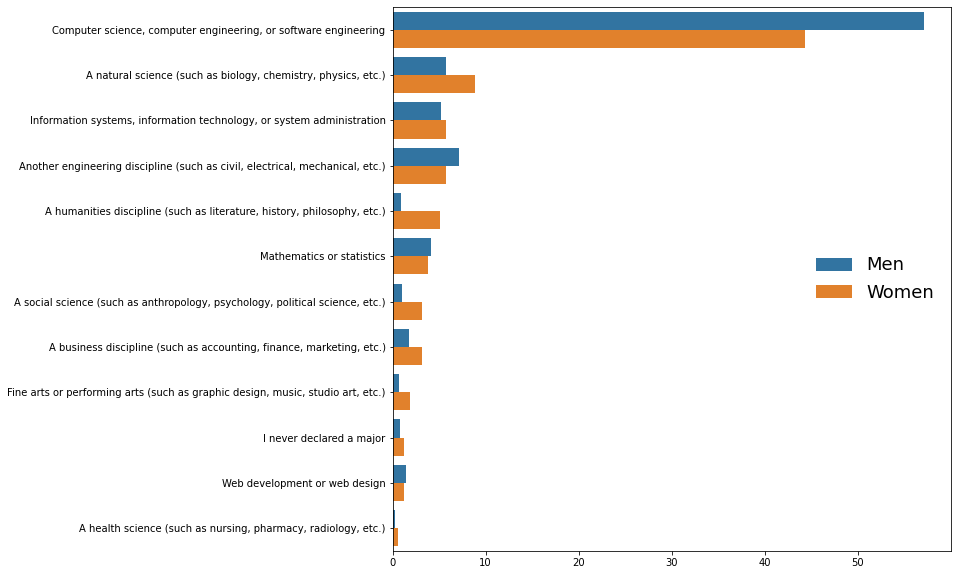

In [93]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

sns.set_color_codes("pastel")
sns.barplot(x="value", y="Field of study", hue="Gender", data=study_df_new)

plt.xlabel("")
plt.ylabel("")

ax.legend(loc='center right', frameon=False, prop={'size':18})

plt.show()

In [94]:
study_df_women = (df_new[df_new['Gender']=='Woman']['EdLevel'].value_counts()/len(df_new[df_new['Gender']=='Woman']['EdLevel'])*100).reset_index()
study_df_men = (df_new[df_new['Gender']=='Man']['EdLevel'].value_counts()/len(df_new[df_new['Gender']=='Man']['EdLevel'])*100).reset_index()
type(study_df_women)
study_df_women.head()
study_df_women.rename(columns={'index': 'Education Level', 'EdLevel': 'Women'}, inplace=True)
study_df_men.rename(columns={'index': 'Education Level', 'EdLevel': 'Men'}, inplace=True)




study_df = pd.merge(study_df_women, study_df_men, on='Education Level' )


study_df['Difference'] = study_df['Women']-study_df['Men'] 
study_df.head(12)

,Education Level,Women,Men,Difference
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",42.405063,34.664107,7.740956
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26.582278,28.637236,-2.054958
2,"Secondary school (e.g. American high school, G...",10.126582,11.593090,-1.466508
3,Some college/university study without earning ...,6.329114,11.401152,-5.072038
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",5.696203,5.335893,0.360310
5,"Associate degree (A.A., A.S., etc.)",3.164557,2.725528,0.439029
6,"Professional degree (JD, MD, etc.)",1.265823,1.420345,-0.154523


In [95]:
rows = [2, 3, 5, 1, 6, 0, 4]
#rows = [4, 0, 6, 1, 5, 3, 2]
study_df=study_df.loc[rows].copy()
study_df.head(12)

,Education Level,Women,Men,Difference
2,"Secondary school (e.g. American high school, G...",10.126582,11.593090,-1.466508
3,Some college/university study without earning ...,6.329114,11.401152,-5.072038
5,"Associate degree (A.A., A.S., etc.)",3.164557,2.725528,0.439029
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26.582278,28.637236,-2.054958
6,"Professional degree (JD, MD, etc.)",1.265823,1.420345,-0.154523
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",42.405063,34.664107,7.740956
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",5.696203,5.335893,0.360310


In [96]:
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot()

#sns.barplot(x="Difference", y="Education Level", data=study_df, capsize = 10)

#plt.xlabel("")
#plt.ylabel("")


#plt.show()

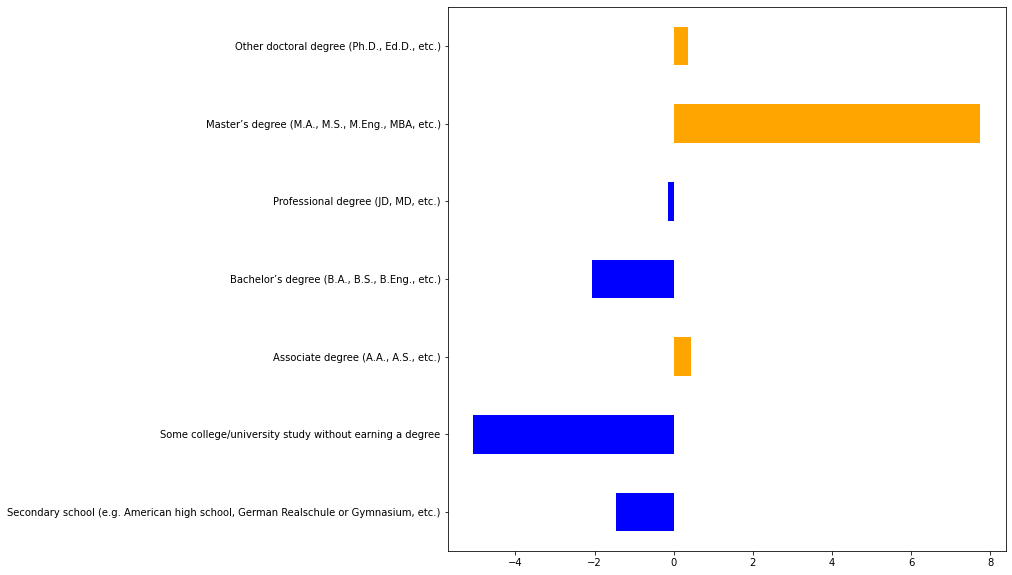

In [97]:
colors = tuple(np.where(study_df["Difference"]>0, 'orange', 'blue'))
ax = study_df.plot(kind = 'barh', x='Education Level', y='Difference', figsize = (10, 10), color = colors);
ax.get_legend().remove()
plt.ylabel("")
plt.show()

In [98]:
df_new[(df_new['Gender']=='Man')]['JobSat'].value_counts()/len(df_new[(df_new['Gender']=='Man')]['JobSat'])*100

Very satisfied                        32.245681
Slightly satisfied                    29.251440
Slightly dissatisfied                 15.163148
Neither satisfied nor dissatisfied    10.403071
Very dissatisfied                      6.257198
Name: JobSat, dtype: float64

In [99]:
df_new[(df_new['Gender']=='Woman')]['JobSat'].value_counts()/len(df_new[(df_new['Gender']=='Woman')]['JobSat'])*100

Very satisfied                        31.012658
Slightly satisfied                    24.683544
Slightly dissatisfied                 17.721519
Neither satisfied nor dissatisfied    12.025316
Very dissatisfied                      6.962025
Name: JobSat, dtype: float64

In [100]:
satisf_df = create_percentage(df_new, 'JobSat', 'Job Satisfaction')
satisf_df.head(10)

,Job Satisfaction,Gender,value
0,Very satisfied,Men,32.245681
1,Slightly satisfied,Men,29.251440
2,Slightly dissatisfied,Men,15.163148
3,Neither satisfied nor dissatisfied,Men,10.403071
4,Very dissatisfied,Men,6.257198
5,Very satisfied,Women,31.012658
6,Slightly satisfied,Women,24.683544
7,Slightly dissatisfied,Women,17.721519
8,Neither satisfied nor dissatisfied,Women,12.025316
9,Very dissatisfied,Women,6.962025


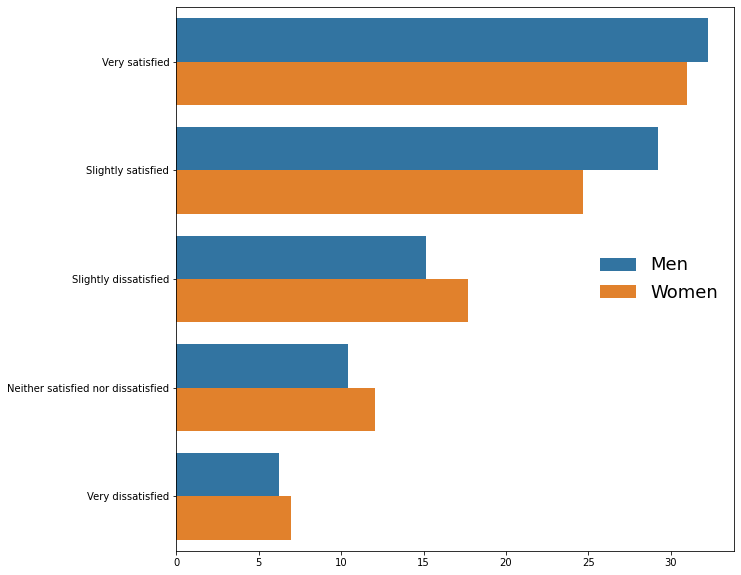

In [101]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

sns.set_color_codes("pastel")
sns.barplot(x="value", y="Job Satisfaction", hue="Gender", data=satisf_df)

plt.xlabel("")
plt.ylabel("")

ax.legend(loc='center right', frameon=False, prop={'size':18})

plt.show()

In [121]:
df_fac =df_new['JobFactors'].str.split(';')
df_fac_long = df_new.assign(method=df_cousin).explode('method')
df_fac = create_percentage(df_fac_long, 'method', 'Job Factors')

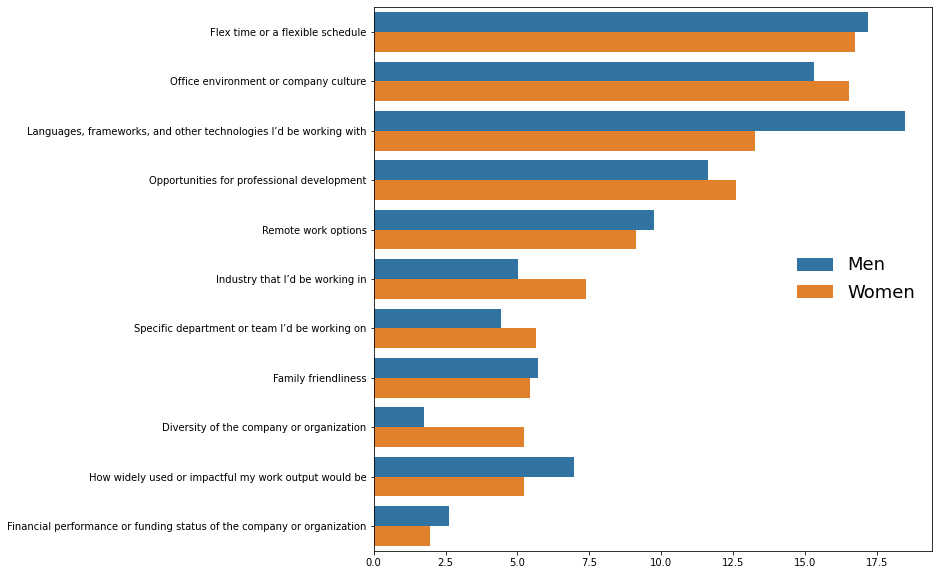

In [122]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

sns.set_color_codes("pastel")
sns.barplot(x="value", y="Job Factors", hue="Gender", data=df_fac)

plt.xlabel("")
plt.ylabel("")

ax.legend(loc='center right', frameon=False, prop={'size':18})

plt.show()

In [20]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['WorkWeekHrs'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['WorkWeekHrs'])*100

40.0    46.842105
30.0     4.210526
38.0     4.210526
45.0     3.157895
35.0     2.631579
32.0     2.631579
60.0     1.578947
44.0     1.052632
50.0     1.052632
20.0     1.052632
18.0     1.052632
7.0      0.526316
47.0     0.526316
43.0     0.526316
9.0      0.526316
36.0     0.526316
42.0     0.526316
39.0     0.526316
25.0     0.526316
37.0     0.526316
19.0     0.526316
14.0     0.526316
Name: WorkWeekHrs, dtype: float64

In [21]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['WorkWeekHrs'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['WorkWeekHrs'])*100

40.00     43.289347
45.00      4.473769
35.00      3.636949
38.00      2.993241
50.00      2.961056
42.00      2.542646
30.00      1.802382
39.00      1.705826
20.00      1.416157
32.00      1.319601
43.00      1.029932
37.00      0.836820
60.00      0.708079
41.00      0.643708
55.00      0.611522
8.00       0.611522
44.00      0.514966
36.00      0.482781
16.00      0.354039
25.00      0.321854
24.00      0.257483
5.00       0.193112
15.00      0.193112
48.00      0.193112
9.00       0.193112
10.00      0.193112
34.00      0.160927
375.00     0.160927
12.00      0.128742
28.00      0.128742
70.00      0.128742
80.00      0.096556
19.00      0.096556
7.00       0.096556
31.00      0.096556
6.00       0.096556
13.00      0.096556
46.00      0.064371
49.00      0.064371
100.00     0.064371
37.50      0.064371
52.00      0.064371
23.00      0.064371
160.00     0.064371
38.75      0.032185
47.00      0.032185
385.00     0.032185
387.00     0.032185
90.00      0.032185
39.50      0.032185


In [28]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['NEWOvertime'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['NEWOvertime'])*100

Sometimes: 1-2 days per month but less than weekly          23.237850
Often: 1-2 days per week or more                            20.437721
Occasionally: 1-2 days per quarter but less than monthly    14.290312
Rarely: 1-2 days per year or less                           10.588993
Never                                                        9.076279
Name: NEWOvertime, dtype: float64

In [29]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['NEWOvertime'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['NEWOvertime'])*100

Often: 1-2 days per week or more                            24.210526
Sometimes: 1-2 days per month but less than weekly          18.947368
Occasionally: 1-2 days per quarter but less than monthly    14.210526
Never                                                       10.000000
Rarely: 1-2 days per year or less                            8.947368
Name: NEWOvertime, dtype: float64

In [26]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['NEWEdImpt'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['NEWEdImpt'])*100

Fairly important                      22.497586
Somewhat important                    20.212424
Very important                        19.761828
Not at all important/not necessary    12.294818
Critically important                   6.984229
Name: NEWEdImpt, dtype: float64

In [27]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['NEWEdImpt'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['NEWEdImpt'])*100

Somewhat important                    22.631579
Very important                        19.473684
Fairly important                      17.894737
Not at all important/not necessary    14.210526
Critically important                   7.894737
Name: NEWEdImpt, dtype: float64